In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree's acc: {acc}")

Decision Tree's acc: 0.7912621359223301


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.67      0.62      0.64        39
           2       0.87      0.81      0.84        81
           3       0.81      0.80      0.81        65
           4       0.58      0.60      0.59        25
           5       0.79      0.78      0.78        40
           6       0.78      0.75      0.77        57
           7       0.64      0.80      0.71        45
           8       0.82      0.66      0.73        47
           9       0.78      0.78      0.78        41
          10       0.58      0.76      0.66        34
          11       0.80      0.83      0.81        58
          12       0.83      0.86      0.84        50
          13       0.93      0.87      0.90        87
          14       0.86      0.77      0.81        48
          15       0.84      0.82      0.83        39

    accuracy                           0.79       824
   macro avg       0.77   

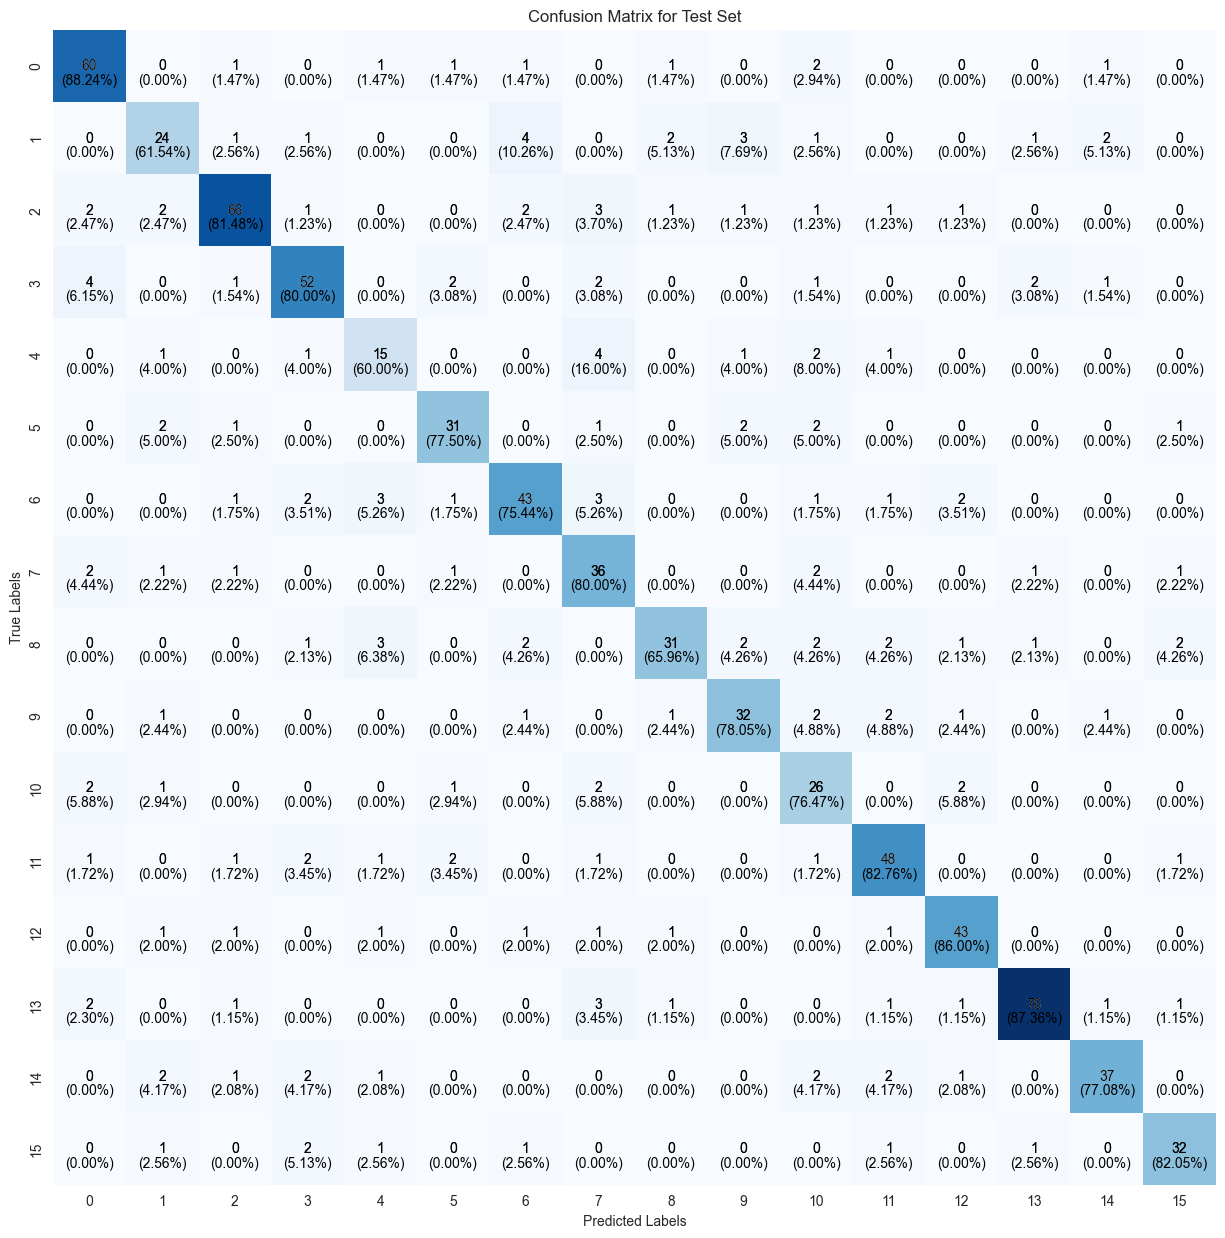

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [10]:
feature_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Yếu tố quan trọng nhất đối với Decision Tree:")
print(feature_imp.head(5))


Top 5 Yếu tố quan trọng nhất đối với Decision Tree:
soft_skill_score      0.121569
Openness              0.112628
Self-enhancement      0.085249
Extraversion          0.073531
Self-transcendence    0.070303
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------------

In [11]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [12]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [13]:
y = df['Role_encoded']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree's acc: {acc}")

Decision Tree's acc: 0.7803398058252428


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        68
           1       0.52      0.59      0.55        39
           2       0.86      0.79      0.83        81
           3       0.83      0.83      0.83        65
           4       0.59      0.68      0.63        25
           5       0.82      0.80      0.81        40
           6       0.75      0.74      0.74        57
           7       0.81      0.76      0.78        45
           8       0.68      0.68      0.68        47
           9       0.88      0.73      0.80        41
          10       0.57      0.74      0.64        34
          11       0.82      0.78      0.80        58
          12       0.80      0.88      0.84        50
          13       0.89      0.85      0.87        87
          14       0.80      0.77      0.79        48
          15       0.73      0.82      0.77        39

    accuracy                           0.78       824
   macro avg       0.76   

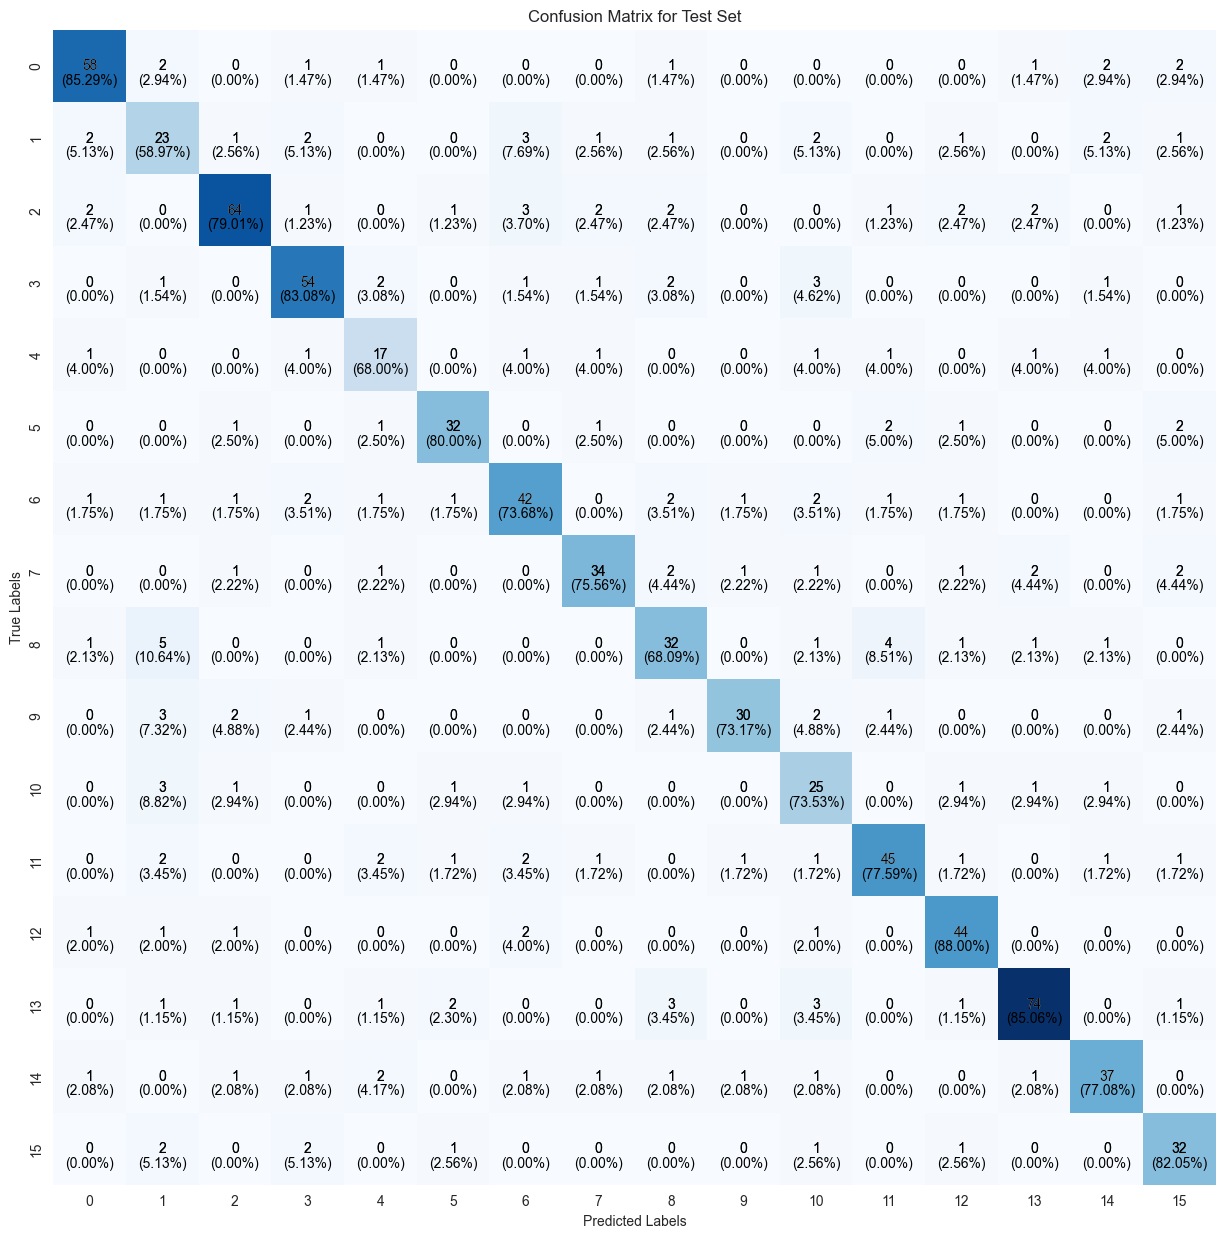

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [19]:
feature_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Yếu tố quan trọng nhất đối với Decision Tree:")
print(feature_imp.head(5))


Top 5 Yếu tố quan trọng nhất đối với Decision Tree:
Self-transcendence    0.212335
Agreeableness         0.108126
Conversation          0.097106
Project Management    0.090689
Self-enhancement      0.079083
dtype: float64
